In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

In [44]:
r3 = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [45]:
r3

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [46]:
r3.response.value_counts()

no     9316
yes    1373
Name: response, dtype: int64

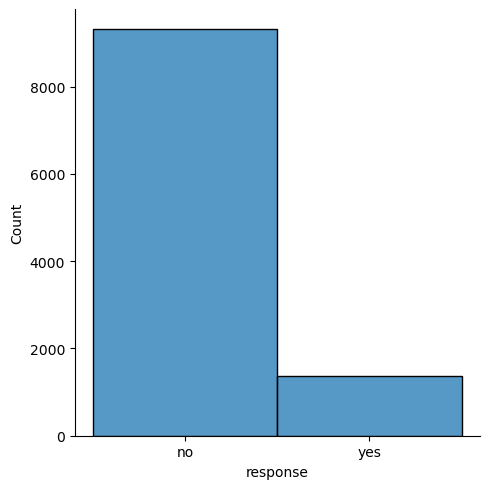

In [47]:
sns.displot(r3.response)

<AxesSubplot:xlabel='response', ylabel='count'>

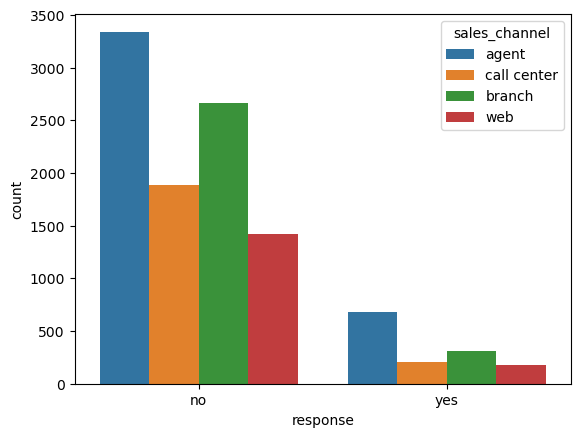

In [48]:
sns.countplot(x ='response', hue = "sales_channel", data = r3)

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

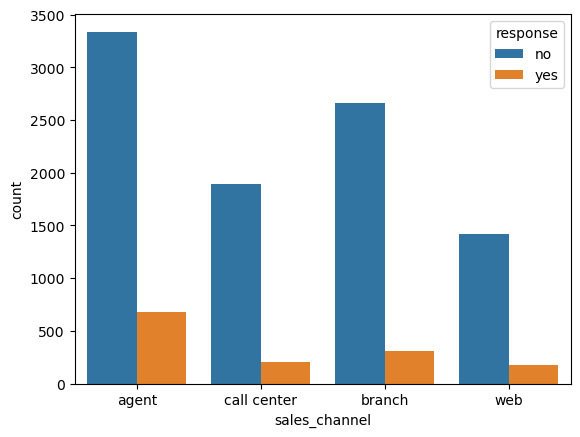

In [49]:
sns.countplot(x ='sales_channel', hue = "response", data = r3)

In [59]:
#response_data = 
#tca_100 = r3[(r3['total_claim_amount'].between(0,100)) & (r3['response']=='yes')]
#tca_200 = r3[r3['total_claim_amount'].between(100,200)]
#bin_201_to_300
#bin_301_to_400
#bin_401_to_500
#bin_501_to_1000
#bin 1001_to_3000

tca_1 = r3[(r3['total_claim_amount'].between(0,100))]
tca_2 = r3[(r3['total_claim_amount'].between(100,200))]
tca_3 = r3[(r3['total_claim_amount'].between(200,300))]
tca_4 = r3[(r3['total_claim_amount'].between(300,400))]
tca_5 = r3[(r3['total_claim_amount'].between(400,500))]
tca_6 = r3[(r3['total_claim_amount'].between(500,1000))]
tca_7 = r3[(r3['total_claim_amount'] >1000)]

tcas = [tca_1,tca_2,tca_3,tca_4,tca_5,tca_6,tca_7]
tca_1
#r3['total_claim_amount']

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
12,north west,19955,no,extended,high school or below,1/31/11,jan,employed,f,69096,...,32,0,2,corporate auto,corporate l3,offer1,agent,64,four-door car,medsize
19,west region,3746,yes,extended,college,2/26/11,feb,employed,f,41479,...,38,1,1,personal auto,personal l2,offer2,call center,19,two-door car,large
27,north west,4376,yes,premium,bachelor,2/28/11,feb,employed,f,63774,...,63,0,1,personal auto,personal l3,offer2,agent,60,four-door car,medsize
43,central,5790,no,basic,master,2/3/11,feb,employed,m,84551,...,82,0,5,personal auto,personal l3,offer2,agent,28,four-door car,large
64,central,5860,no,basic,bachelor,2/1/11,feb,employed,m,94527,...,32,0,3,personal auto,personal l1,offer1,agent,41,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10646,west region,5480,no,basic,doctor,1/19/11,jan,employed,m,59311,...,38,0,9,corporate auto,corporate l3,offer1,web,14,four-door car,medsize
10663,north west,22563,no,basic,high school or below,1/17/11,jan,employed,m,23046,...,7,3,2,personal auto,personal l3,offer4,branch,1,suv,small
10667,west region,6928,no,basic,bachelor,1/10/11,jan,employed,m,22907,...,86,2,1,personal auto,personal l2,offer4,call center,49,luxury suv,medsize
10669,north west,4660,no,basic,bachelor,2/3/11,feb,employed,f,89834,...,11,0,1,corporate auto,corporate l3,offer1,branch,43,four-door car,medsize


In [62]:
bins = [0,100,200,300,400,500,1000,3000]
r3['binned'] = pd.cut(r3['total_claim_amount'], bins)
r3['binned']

0          (200, 300]
1         (500, 1000]
2          (400, 500]
3          (400, 500]
4         (500, 1000]
             ...     
10684    (1000, 3000]
10685      (200, 300]
10686      (300, 400]
10687     (500, 1000]
10688    (1000, 3000]
Name: binned, Length: 10689, dtype: category
Categories (7, interval[int64, right]): [(0, 100] < (100, 200] < (200, 300] < (300, 400] < (400, 500] < (500, 1000] < (1000, 3000]]

In [64]:
r3.columns.unique()

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'month', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'binned'],
      dtype='object')

<AxesSubplot:xlabel='binned', ylabel='count'>

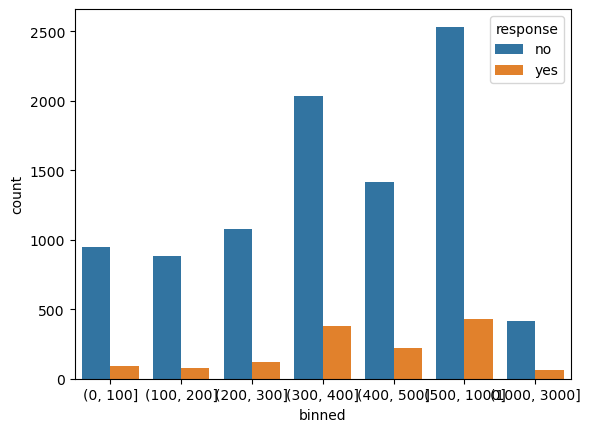

In [63]:
sns.countplot(x='binned',hue='response',data=r3)

In [67]:
r3['income'].max()

99981

In [68]:
bins2 = range(10000,100000,10000)
r3['binned2'] = pd.cut(r3['income'], bins2)
r3['binned2']

0        (40000.0, 50000.0]
1                       NaN
2        (20000.0, 30000.0]
3        (40000.0, 50000.0]
4        (20000.0, 30000.0]
                ...        
10684    (60000.0, 70000.0]
10685    (60000.0, 70000.0]
10686    (30000.0, 40000.0]
10687    (60000.0, 70000.0]
10688    (60000.0, 70000.0]
Name: binned2, Length: 10689, dtype: category
Categories (8, interval[int64, right]): [(10000, 20000] < (20000, 30000] < (30000, 40000] < (40000, 50000] < (50000, 60000] < (60000, 70000] < (70000, 80000] < (80000, 90000]]

<AxesSubplot:xlabel='binned2', ylabel='count'>

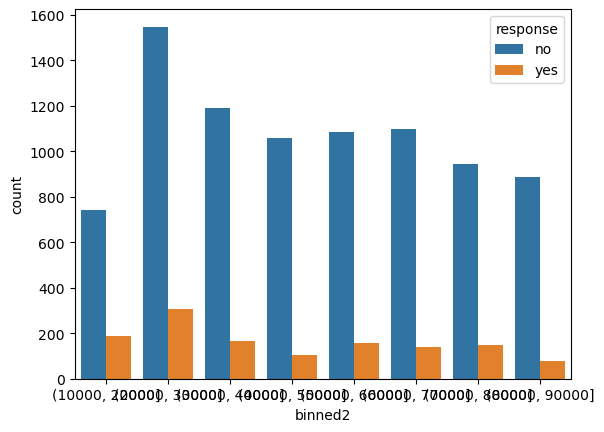

In [69]:
sns.countplot(x='binned2',hue='response',data=r3)